# AUTOMOBILE DATASET
This dataset has been taken from kaggle to infer meaningful insights.


In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv file into dataframe
df = pd.read_csv("Automobile.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

## Fuel Type

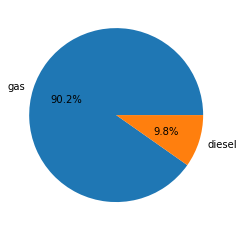

In [4]:
fuel_details = df['fuel_type'].value_counts()
sizes = fuel_details.values
labels1 = fuel_details.index

plt.pie(sizes,labels = labels1 , autopct= '%1.1f%%')
plt.show()

We can infer that almost 90.2% cars run on gas.
#### Gas is the Popular Fuel Type

## Body Style

In [5]:
df['body_style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

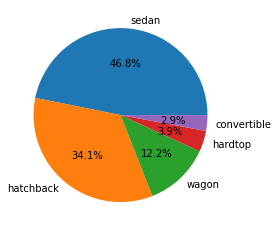

In [6]:
body_style_data = df['body_style'].value_counts()
sizes = body_style_data.values
labels2 = body_style_data.index

plt.pie(sizes,labels=labels2,autopct='%1.1f%%')
plt.show()

#### SEDAN is the most popular body type for the cars in this dataset

## PRICE ANALYSIS
#### Data Preparation

In [7]:
#checking for missing values in the dataset
df.isnull().any(axis = 0)

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_doors             True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_cylinders        False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

We have null values in columns:
normalized_losses, m_doors , bore ,roke , peak_rpm , price

Let us handle the missing values in the price column

In [8]:
#changing the datatype of price to float 32
df['price'] = df['price'].astype('float32')
df['price'].dtype

dtype('float32')

Let us check total null values in price column. 
If we have less than 10 null values in 204 entires : let us replace it with the average value of the cars.
Strategy = if value<10 ,replace.

In [9]:
df['price'].isnull().sum()

4

In [10]:
df['price'] = df['price'].fillna(df['price'].mean())

In [11]:
#checking if all null values are replaced 
df['price'].isnull().sum()

0

### Finding Insights from Price Column

Let us analyse the Price column to obtain insights, such as:
1. the minimum price
2. maximum price
3. average price
4. standard deviation

We can obtain the details with pandas alone but it's best practise to use numpy to handle operations on numerical data.
Let's see how

In [12]:
#let's convert the price data to ndarray
px = np.array(df['price'].values)

In [13]:
type(px)

numpy.ndarray

In [14]:
#Minimum price
print(str(px.min()) + " is the minimum price of a car in the dataset")

5118.0 is the minimum price of a car in the dataset


In [15]:
#Maximum Price
print(str(px.max())+ " is the maximum price of a car in the dataset")

45400.0 is the maximum price of a car in the dataset


In [16]:
#Average Price
print(str(round(px.mean()*100,2))+ " is the average price of the cars in this dataset")

1320712.89 is the average price of the cars in this dataset


In [17]:
#Standard Deviation
standard_deviation = round(px.std()*100,2)
print(str(round(px.std()*100,2)) + " is standard deviation")

784955.27 is standard deviation


#### Bar Chart for Mean and Standard Deviation in Prices

<AxesSubplot:>

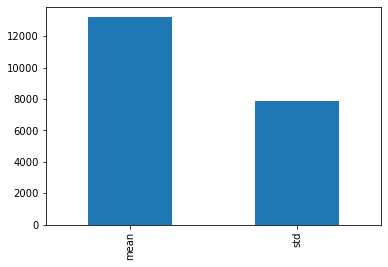

In [18]:
diagram = df["price"].agg([np.mean, np.std])
diagram.plot(kind='bar')

### Body Style vs Price

In [19]:
bdt_price_df = df.groupby('body_style')['price']

In [20]:
type(bdt_price_df)

pandas.core.groupby.generic.SeriesGroupBy

<AxesSubplot:xlabel='body_style', ylabel='price'>

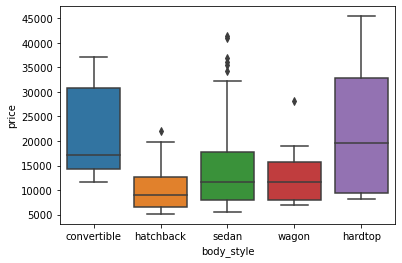

In [21]:
import seaborn as sns
sns.boxplot(x = df['body_style'], y= df['price'])

#### Hardtop and Convertible Cars are Expensive

### Fuel Type vs Prices

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

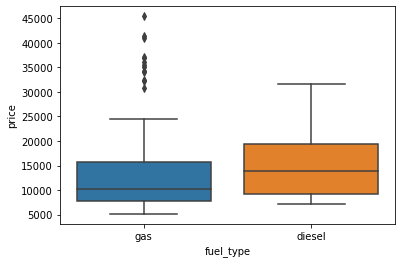

In [22]:
ft_prices = df.groupby('fuel_type')['price']
sns.boxplot(x=df['fuel_type'], y = df['price'])

#### Diesel cars are expensive

## TOP 10 Car Makers : Pie Chart

In [23]:
#Let us plot a PIE CHART for top 10 Car Makers
df['make'].isnull().sum()

0

In [24]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

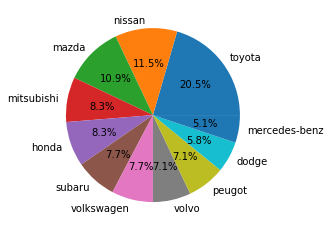

In [25]:
#defining values for pie chart
top_10_carmakers = df['make'].value_counts()[0:11]
top_10_carmakers
top_10label = top_10_carmakers.index
top_10sizes = top_10_carmakers.values

plt.pie(top_10sizes, labels=top_10label, autopct= '%1.1f%%')
plt.show()

#### This chart denotes that Toyota , Nissan , Mazda , Honda and Mitsubishi are the top 10 car makers for the present dataset